In [1]:
using Pkg
Pkg.activate("..")
using Plots
using HCubature

  Activating project at `~/Documents/STUDY/Bsc/CondensedMat`


In [16]:
T = Vector(5:0.1:1000) # Temperature range (K)
N = 6.022e23
theta_D = 1860;  # Debye temperature for diamond (K)
k = 1.38e-23;

# Specific Heat of Solids
---

The specific heat of a solid is a measure of the amount of heat needed to raise the solid's temperature by a unit degree. Different models have been proposed to explain the specific heat of solids, including the Boltzmann, Einstein, and Debye models.
In this notebook, we target the specific heat of solids according to the Boltzmann, Einstein, and Debye models. We will also visualize these models' specific heat curves.


### The Boltzmann Model

According to the classical model (a.k.a law of Dulong–Petit), the specific heat of a solid remains constant at high temperatures. The specific heat capacity, $C_v$, is given as:

$$C_v = 3Nk$$

Where $N$ is the number of atoms, and $k$ is the Boltzmann constant.

This is achieved with the assumption that the atoms in a solid vibrate independently of each other. According to this model, the specific heat is proportional to the number of atoms in the solid, with each atom contributing equally to the total specific heat.

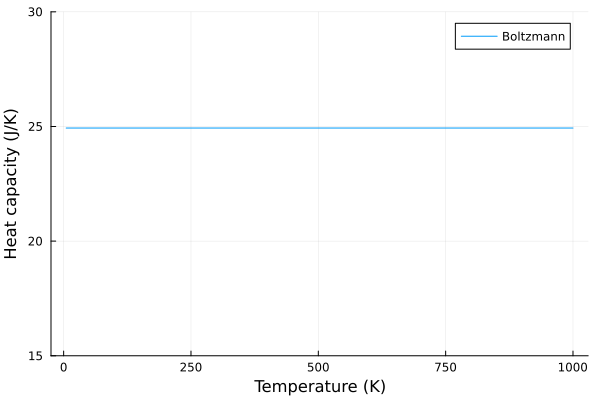

In [32]:
function boltzmann(N = 6.022e23, k = 1.38e-23)
    return 3 * N * k
end
c_v_boltzmann = boltzmann()*ones(length(T));
plot(T, c_v_boltzmann, label = "Boltzmann", xlabel="Temperature (K)", ylabel="Heat capacity (J/K)", ylims=(15, 30))

### Einstein Model

The Einstein model of specific heat assumes that the atoms in a solid vibrate in a harmonic oscillator potential. According to this model, the specific heat is proportional to the temperature, with the proportionality constant depending on the vibrational frequency of the atoms.

The Einstein model is a good approximation for low temperatures, where the interatomic forces dominate and the atoms vibrate in a harmonic potential. However, at high temperatures, the model fails to accurately predict the specific heat of the solid, as the vibrational energy of the atoms becomes significant.

The Einstein model improves upon the classical model by accounting for quantum effects. In this model, the specific heat capacity, $C_v$, is given as:

$$
C_v = 3Nk\left(\frac{T_E}{T}\right)^2\frac{e^{\frac{T_E}{T}}}{\left(e^{\frac{\beta}{T}}-1\right)^2}
$$

Where $T_E$ is the Einstein temperature, and $T$ is the absolute temperature.



In [33]:
function einstein_specific_heat(T, theta_E)
    x = theta_E ./ T
    return 3 .* N .* k .* (x .^ 2) .* (exp.(x) ./ (exp.(x) .- 1).^2)
end
plot(T, C_v_einstein, label = "Einstein", xlabel="Temperature (K)", ylabel="Heat capacity (J/K)")
savefig("02.png")


"/home/jose/Documents/STUDY/Bsc/CondensedMat/notes/02.png"

Now, lets see what happens when we change the Einstein temperature, $T_E$

┌ Info: Saved animation to /home/jose/Documents/STUDY/Bsc/CondensedMat/notes/einstein.gif
└ @ Plots /home/jose/.julia/packages/Plots/B5j7d/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/Bsc/CondensedMat/notes/einstein.gif")
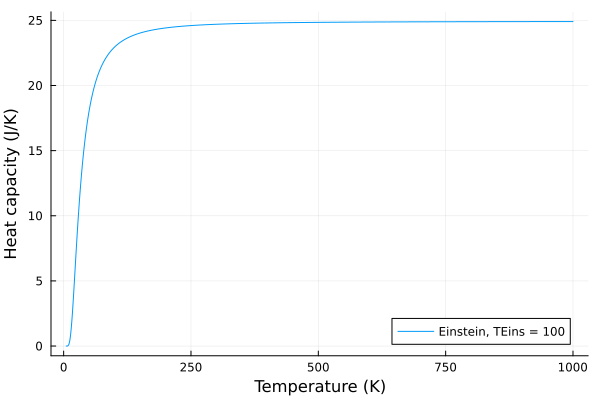

In [27]:
eins_temps = 100:5:2000
anim = @animate for p in eins_temps
    c_v_einstein = einstein_specific_heat(T, p)
    plot(T, c_v_einstein, label = "Einstein, TEins = $p", xlabel="Temperature (K)", ylabel="Heat capacity (J/K)")
end
gif(anim, "einstein.gif", fps = 20)

### Debye Model

Here we assume that the atoms in a solid vibrate in a lattice structure, with each atom interacting with its neighboring atoms through interatomic forces. According to this model, the vibrational modes of the solid can be represented as phonons, which are quantized units of lattice vibrations.

The specific heat in the Debye model is proportional to the cube of the temperature, with the proportionality constant depending on the number of phonons and the speed of sound in the solid. The Debye model is a good approximation for both low and high temperatures and provides a more accurate representation of the specific heat of solids than the Boltzmann and Einstein models.
The Debye model is another improvement on the classical model, providing a more accurate description of specific heat at low temperatures. In the Debye model, the specific heat capacity, $C_v$, is given as:

$$
C_v = 9Nk\left(\frac{T}{\Theta_D}\right)^3\int_0^{\frac{\Theta_D}{T}}\frac{x^4e^x}{(e^x-1)^2}dx
$$

Where $\Theta_D$ is the Debye temperature.

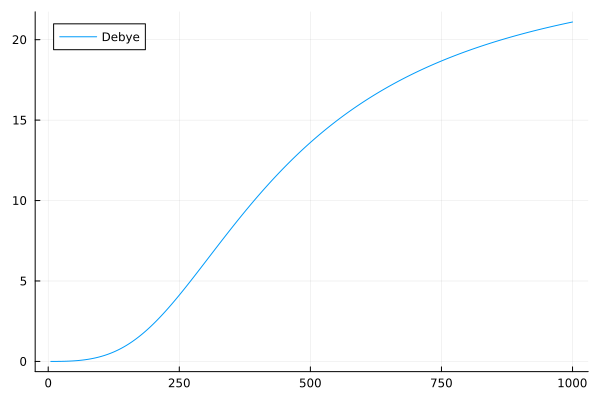

In [35]:
function debye_integrand(x) 
    (x.^4) .* exp.(x) ./ (exp.(x) .- 1).^2
end
function debye_specific_heat(T, theta_D)
    C_v = []
    for (i, t) in enumerate(T)
        integral, _ = hcubature(debye_integrand, [0], [theta_D / t])
        push!(C_v, 9 * N * k * (t / theta_D)^3 * integral[1])
    end
    return C_v
end
C_v_debye = debye_specific_heat( T, theta_D)
plot(T, C_v_debye, label = "Debye")

The behavior of the specific heat of solids modeled by Debye also behaves slightly differently than the Einstein model. The Debye model predicts a slower change in specific heat with temperature, and a more rapid decrease in specific heat with temperature.

┌ Info: Saved animation to /home/jose/Documents/STUDY/Bsc/CondensedMat/notes/debye_eins.gif
└ @ Plots /home/jose/.julia/packages/Plots/B5j7d/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/Bsc/CondensedMat/notes/debye_eins.gif")
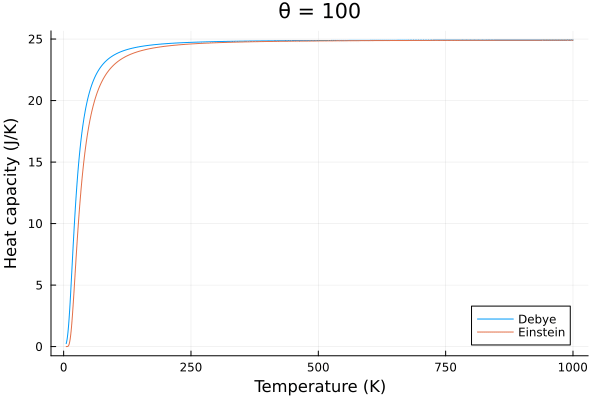

In [30]:
anim = @animate for p in eins_temps
    c_v_debye = debye_specific_heat(T, p)
    c_v_einstein = einstein_specific_heat(T, p)
    plot(title="θ = $p")
    plot!(T, c_v_debye, label = "Debye", xlabel="Temperature (K)", ylabel="Heat capacity (J/K)")
    plot!(T, c_v_einstein, label = "Einstein")
end
gif(anim, "debye_eins.gif", fps = 20)

## Conclusion

In this notebook, we have seen the specific heat of solids according to the Boltzmann, Einstein, and Debye models. We have also visualized these models' specific heat curves.

References:

https://podcasts.ox.ac.uk/series/oxford-solid-state-basics

